## 3-D Triangle Classification and Simulation
Name: Divya Natekar

Net ID: dyn2009

NYU ID: N19974330
### What does this program do?
Let us imagine a LiDAR scanner placed at the origin (0, 0, 0) in 3D space. It emits a conical beam upward along the Y-axis, forming a 3D pyramidal field of view. The cone’s angular spread is restricted to ±22.5° horizontally, meaning that any point that lies too far in the X or Z directions (relative to its height in Y) falls outside the scanner’s effective visibility.

#### i. Importing the required libraries:

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math


#### ii. Cleaning the dataset:

In [2]:
# Load 'x', 'y', 'z' columns from the first point cloud in your Google Sheet
url = 'https://docs.google.com/spreadsheets/d/1io-mxKbNpP8YIhzwwsWFRvGTvry2Ao0j/export?format=csv&gid=836186177'
df = pd.read_csv(url)

# Keep only the first 3D set: x, y, z
df = df[['x', 'y', 'z']].copy()
df.columns = ['X', 'Y', 'Z']
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
df['Z'] = pd.to_numeric(df['Z'], errors='coerce')
df = df.dropna(subset=['X', 'Y', 'Z']).reset_index(drop=True)


#### iii. Defining 3-D field of view Angle and Computing the Boundaries:

In [3]:
# Define field of view angle (e.g., 45° total, so ±22.5° from Y-axis)
theta_deg = 22.5
theta_rad = math.radians(theta_deg)
slope = math.tan(theta_rad)


#### iv. Classifying the points inside and outside the 3-D Pyramid:

In [4]:
# Inside condition: Y > 0 and X, Z within ± Y * tan(theta)
inside_mask = (df['Y'] > 0) & \
              (df['X'] >= -slope * df['Y']) & (df['X'] <= slope * df['Y']) & \
              (df['Z'] >= -slope * df['Y']) & (df['Z'] <= slope * df['Y'])

inside_points = df[inside_mask]
outside_points = df[~inside_mask]


#### v. Plotting the 3-D scatter plot with the Pyramid inclusions:

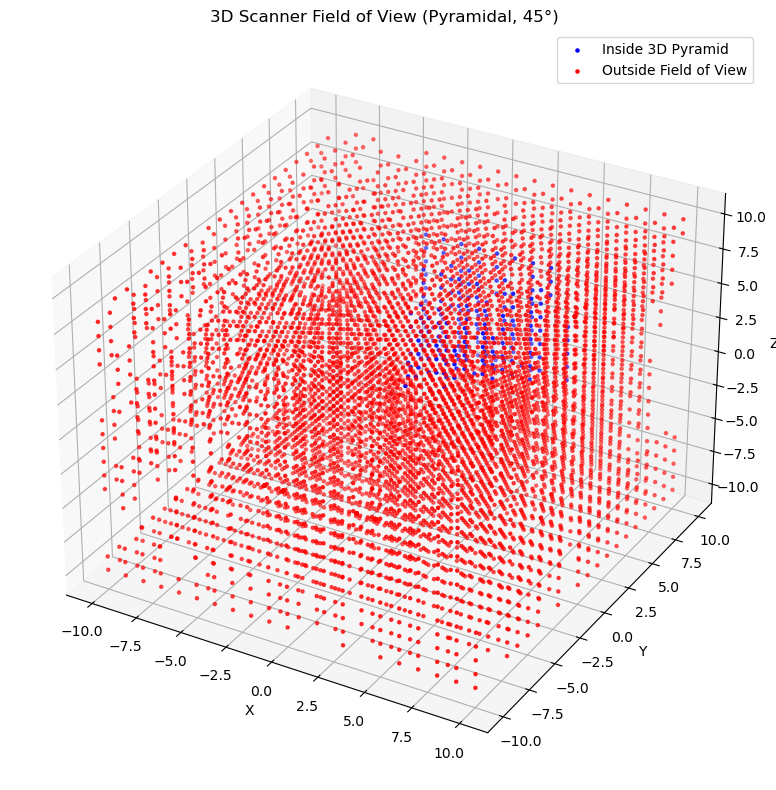

In [5]:
# Plot points in 3D showing scanner's field of view
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot inside and outside points
ax.scatter(inside_points['X'], inside_points['Y'], inside_points['Z'],
           color='blue', s=5, label='Inside 3D Pyramid')
ax.scatter(outside_points['X'], outside_points['Y'], outside_points['Z'],
           color='red', s=5, label='Outside Field of View')

# Labeling and view
ax.set_title("3D Scanner Field of View (Pyramidal, 45°)")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.tight_layout()
plt.show()
